In [3]:
import pandas as pd
data = pd.read_csv('wine.data',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


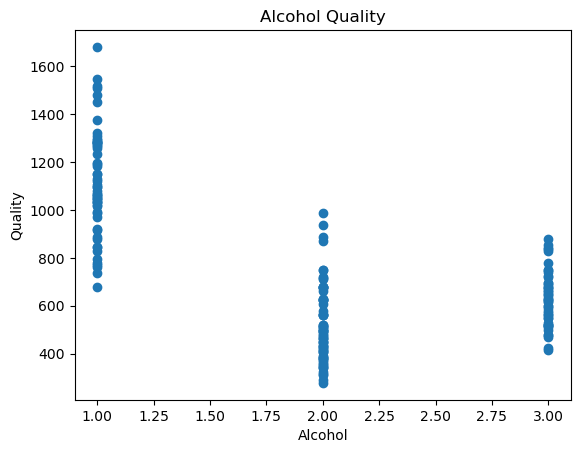

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:,0],data.iloc[:,-1])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol Quality')
plt.show()

### Intention = Predict the Quality

In [5]:
a = list(data.columns) # To get column names
a 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = data[list(data.columns)[:-1]]
y = data.iloc[:,-1]
y

0      1065
1      1050
2      1185
3      1480
4       735
       ... 
173     740
174     750
175     835
176     840
177     560
Name: 13, Length: 178, dtype: int64

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42)

In [8]:
print("xtrain.shape =",xtrain.shape)
print("xtest.shape =",xtest.shape)
print("ytrain.shape =",ytrain.shape)
print("ytest.shape =",ytest.shape)

xtrain.shape = (133, 13)
xtest.shape = (45, 13)
ytrain.shape = (133,)
ytest.shape = (45,)


In [9]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [10]:
k = model.predict(xtest)
k

array([1052.34716076, 1042.97696569,  496.06228404, 1098.28840218,
        548.71962888, 1177.3166432 ,  410.06833427,  649.34255182,
        521.47721339,  518.60028114,  945.93171365,  667.48788862,
        861.02024932,  559.55884833, 1218.63440997,  459.77869001,
        572.93999854,  536.41258952, 1132.92050991,  484.50665659,
       1208.67898411,  610.47816917,  707.21439961,  729.82865512,
        696.1238394 ,  726.67213282,  489.49435358,  694.58329581,
        533.14584213, 1173.1534795 , 1081.38794186,  425.37665623,
        436.65277612, 1111.05770624, 1080.36360349, 1051.90742979,
       1073.18352021,  427.36895534,  535.89551212,  956.92987739,
        917.0030857 ,  518.8452472 ,  608.32563332,  785.79304476,
        465.17754199])

In [11]:
ypred = model.score(xtest,ytest)
ypred

0.7026391374337797

In [12]:
for i,pred in enumerate(k):
    print("Predicted Value =",pred,"| Actual Value =",ytest.iloc[i])

Predicted Value = 1052.347160759151 | Actual Value = 845
Predicted Value = 1042.9769656872857 | Actual Value = 1080
Predicted Value = 496.0622840433545 | Actual Value = 600
Predicted Value = 1098.2884021792818 | Actual Value = 1285
Predicted Value = 548.7196288830278 | Actual Value = 510
Predicted Value = 1177.3166431988916 | Actual Value = 1280
Predicted Value = 410.06833427383555 | Actual Value = 564
Predicted Value = 649.3425518208581 | Actual Value = 750
Predicted Value = 521.4772133879953 | Actual Value = 680
Predicted Value = 518.6002811367225 | Actual Value = 780
Predicted Value = 945.9317136480201 | Actual Value = 845
Predicted Value = 667.4878886236513 | Actual Value = 500
Predicted Value = 861.0202493229473 | Actual Value = 1035
Predicted Value = 559.5588483292603 | Actual Value = 372
Predicted Value = 1218.6344099743237 | Actual Value = 1310
Predicted Value = 459.77869000986027 | Actual Value = 325
Predicted Value = 572.939998541694 | Actual Value = 434
Predicted Value = 536

In [13]:
model.coef_ # 13 feature in total so 13 coefficient vallues

array([-308.76085432,   59.32502431,  -20.85303935,  140.29669949,
         -8.05758865,    1.7843861 ,   79.19045302, -132.83431882,
       -124.2983655 ,   43.68697287,   49.9083309 ,   47.40654969,
        -32.70903008])

## Scoring

In [14]:
from sklearn.metrics import r2_score
print(r2_score(ytest,k)) # r2_score(actual,predicted)

0.7026391374337797
